<Axes: xlabel='Clasificacion'>

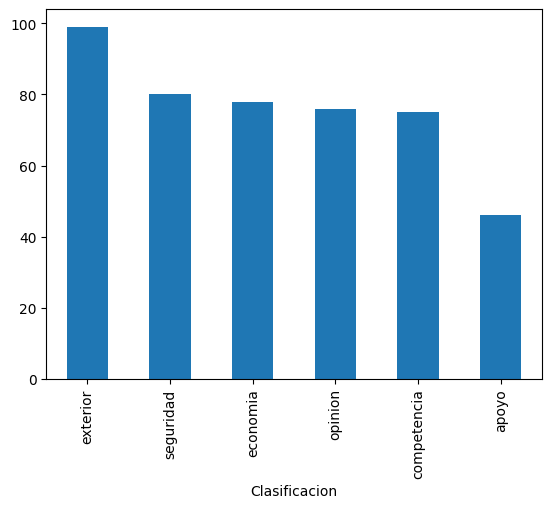

In [30]:
import pandas as pd
df = pd.read_csv("../clean_amlo.csv")
df['Clasificacion'].value_counts().plot(kind='bar')

In [31]:
import tensorflow as tf
import spacy
nlp = spacy.load('es_core_news_lg')

In [32]:
import nltk
import re
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words_es = stopwords.words('spanish')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [33]:
mapper = {
    'exterior': 0,
    'seguridad':1,
    'economia': 2,
    'opinion':3,
    'competencia': 4,
    'apoyo':5,
}
df['Clasificacion'] = df['Clasificacion'].map(mapper)

In [34]:
df['vector'] = df["vector"].apply(lambda x: 
                           np.fromstring(
                               x.replace('\n','')
                                .replace('[','')
                                .replace(']','')
                                .replace('  ',' '), sep=' '))

In [35]:
from sklearn.model_selection import train_test_split

X = df["vector"]
X = np.concatenate(X, axis=0).reshape(-1,300)
y = df["Clasificacion"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.80, random_state = 101, stratify = y)

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [39]:
from keras.src.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [40]:
from tensorflow.keras.utils import to_categorical

In [41]:
y_train = to_categorical(y_train,6)
y_test = to_categorical(y_test,6)

In [46]:
model = Sequential()
model.add(Dense(units = 54, activation='relu', input_dim=300))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 6,   activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train,
                    batch_size=10, epochs=100,
                    validation_data = (X_test,y_test),
                    callbacks=(early_stopping))

Epoch 1/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1978 - accuracy: 0.5427 - val_loss: 1.3465 - val_accuracy: 0.4725
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1484 - accuracy: 0.5372 - val_loss: 1.3164 - val_accuracy: 0.4396
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1461 - accuracy: 0.5399 - val_loss: 1.3462 - val_accuracy: 0.4835
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1241 - accuracy: 0.5730 - val_loss: 1.3563 - val_accuracy: 0.4396
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1241 - accuracy: 0.5702 - val_loss: 1.2989 - val_accuracy: 0.4945
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1657 - accuracy: 0.5317 - val_loss: 1.2896 - val_accuracy: 0.4725
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 1.1406 - accuracy: 0.5537 - val_loss: 1.3063 - val_accuracy: 0.4945
Epoch 8/100
3

In [50]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.197765,0.542700,1.346488,0.472527
1,1.148410,0.537190,1.316378,0.439560
2,1.146110,0.539945,1.346176,0.483516
3,1.124079,0.573003,1.356302,0.439560
4,1.124105,0.570248,1.298872,0.494505


<Axes: >

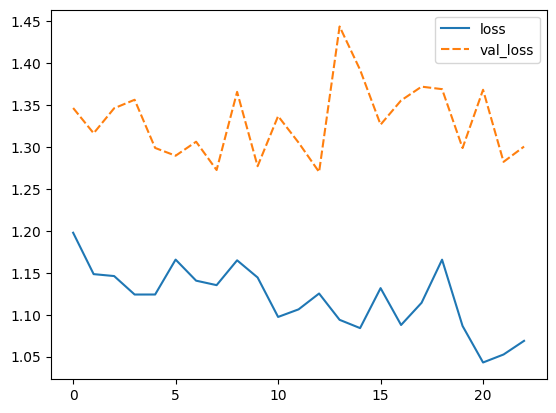

In [52]:
import seaborn as sns
sns.lineplot(data=metrics[['loss','val_loss']])

<Axes: >

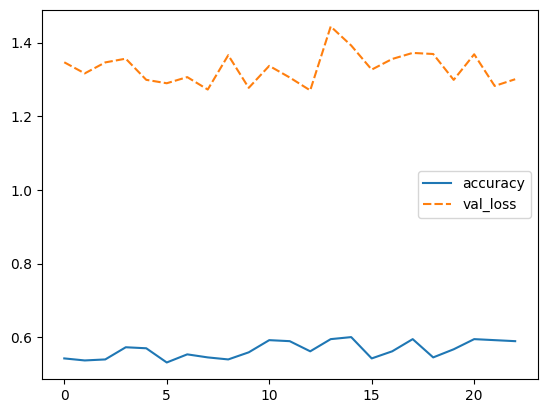

In [53]:
import seaborn as sns
sns.lineplot(data=metrics[['accuracy','val_loss']])

In [54]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 1ms/step


array([[1.44990891e-01, 1.10148728e-01, 1.59964383e-01, 1.89089105e-01,
        1.76268727e-01, 2.19538212e-01],
       [1.36832476e-01, 6.77843466e-02, 2.19143271e-01, 4.40472752e-01,
        9.53915492e-02, 4.03756090e-02],
       [4.52228300e-02, 1.07932203e-01, 6.05894744e-01, 1.26172584e-02,
        1.72105841e-02, 2.11122349e-01],
       [6.52670801e-01, 7.55347535e-02, 6.82979524e-02, 1.13140391e-02,
        2.78858468e-02, 1.64296567e-01],
       [1.79828063e-01, 1.89583465e-01, 7.36578181e-02, 3.94997180e-01,
        1.35206446e-01, 2.67269742e-02],
       [4.61614653e-02, 9.48648155e-02, 4.59028751e-01, 3.23531800e-03,
        3.92083265e-03, 3.92788798e-01],
       [3.35963964e-01, 3.74477774e-01, 9.38669667e-02, 8.99668708e-02,
        7.16332868e-02, 3.40910368e-02],
       [3.90638635e-02, 4.09233533e-02, 4.58139777e-01, 1.02397986e-03,
        2.26854044e-03, 4.58580405e-01],
       [2.45878667e-01, 1.10306688e-01, 3.66322547e-02, 2.40793765e-01,
        3.53822798e-01, 

In [56]:
umbral = 0.5
y_pred = np.where(y_pred > umbral, 1,0)
y_pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.35      0.50        20
           1       1.00      0.31      0.48        16
           2       0.58      0.44      0.50        16
           3       0.25      0.07      0.11        15
           4       0.75      0.20      0.32        15
           5       0.50      0.11      0.18         9

   micro avg       0.69      0.26      0.38        91
   macro avg       0.66      0.25      0.35        91
weighted avg       0.68      0.26      0.37        91
 samples avg       0.26      0.26      0.26        91



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
